# BASEBALL CASE STUDY

## Problem Statement

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 


### Features

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors

-- Output: Number of predicted wins (W)

### Importing Libraries

In [674]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import joblib
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None) # to see all the rows
pd.set_option('display.max_columns', None) # to see all the columns

### Reading and exploring the dataset:

In [675]:
BCS=pd.read_csv('Baseball Case Study.csv')
BCS

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [676]:
BCS.shape

(30, 17)

This dataset has 30 rows and 17 attributes

In [677]:
BCS.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


First five rows.

In [678]:
BCS.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


Bottom five rows.

In [679]:
BCS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


There are no null values in this dataset.

In [680]:
BCS.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

These are columns in the dataset.

In [681]:
BCS.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

All the columns are of float type except ERA(Earned Run Average)

In [682]:
BCS.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Mean and Meadian values of all the attributes are very close.

There is huge difference between 75% and max values in ERA,E and SHO columns, which leads to the possiblity of outliers.

## Exploratory Data Analysis

### Univariate Analysis

<AxesSubplot:xlabel='R'>

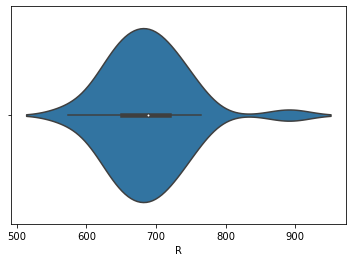

In [683]:
sns.violinplot(BCS['R'])

In this violin plot we can see most of the teams have scored runs in range of 600 to 800.Very few teams have scored in range of 900.

<AxesSubplot:xlabel='AB'>

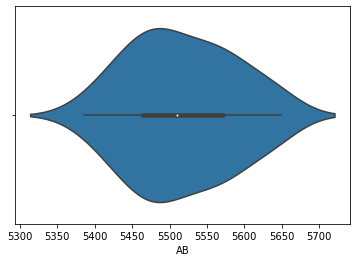

In [684]:
sns.violinplot(BCS['AB'])

We can see at bat is densely populated at 5550.

<AxesSubplot:xlabel='H'>

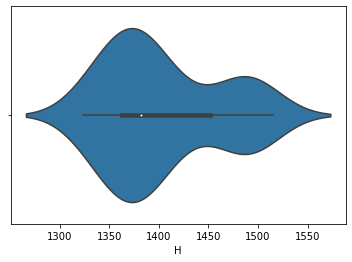

In [685]:
sns.violinplot(BCS['H'])

Most hits are from 1350 to 1450.

In [686]:
Cols=BCS.columns
Cols

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

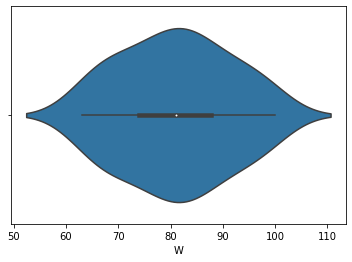

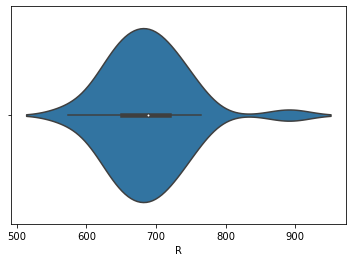

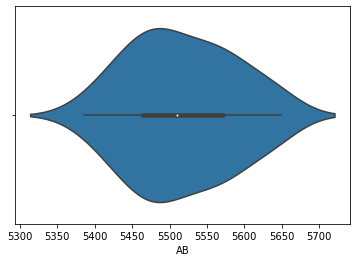

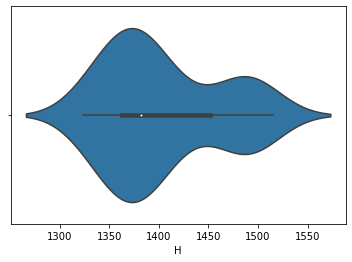

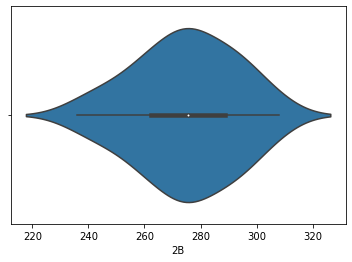

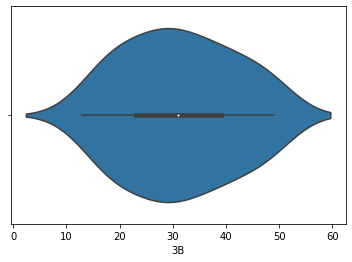

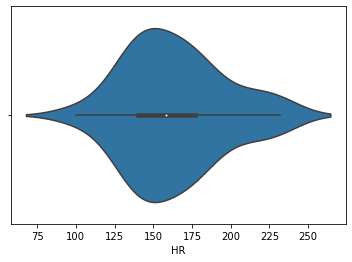

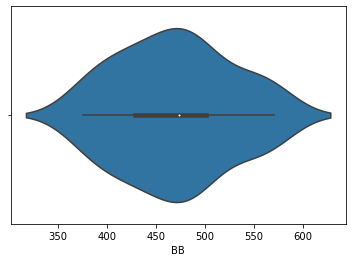

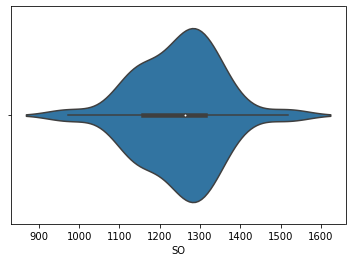

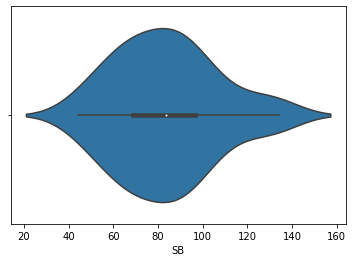

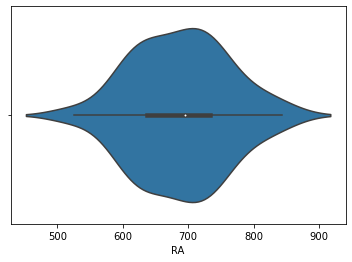

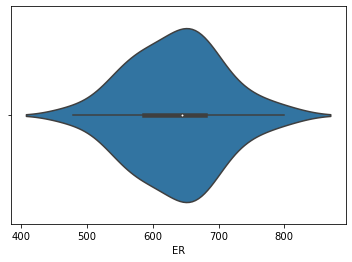

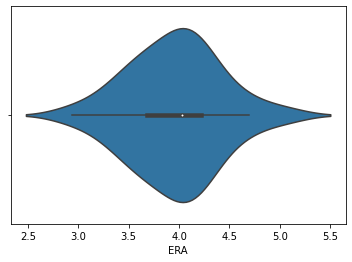

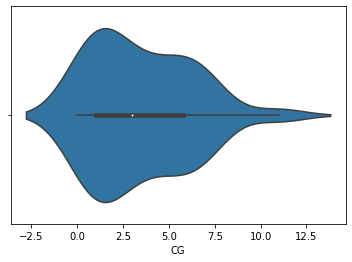

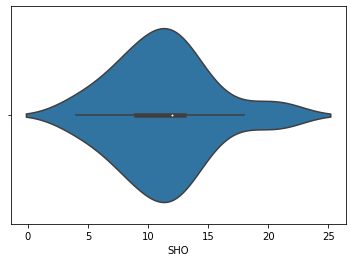

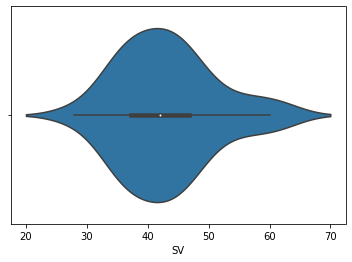

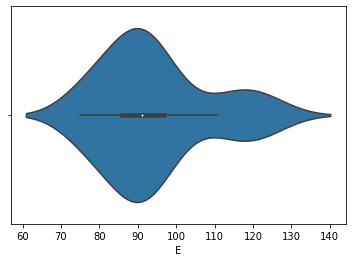

In [687]:
for i in Cols:
    sns.violinplot(BCS[i])
    plt.show()

Observations:

1)High probablity of doubles in range of 260 to 300.

2)High probablity of triples in range of 20 to 40.

3)Homeruns are probably 125 to 200.

4)Strike out are mostly from 1100 to 1400.

5)Stolen bases are high from 60 to 110.

6)High probablity of runs allowed from 600 to 800.

7)Few runs are earned from 400 to 500 or 700 to 900.

8)Earned run average are mostly from 3.5 to 4.5.

9)Saves are high from 30 to 50.

10)Errors are high from 80 to 100.

<AxesSubplot:xlabel='W', ylabel='count'>

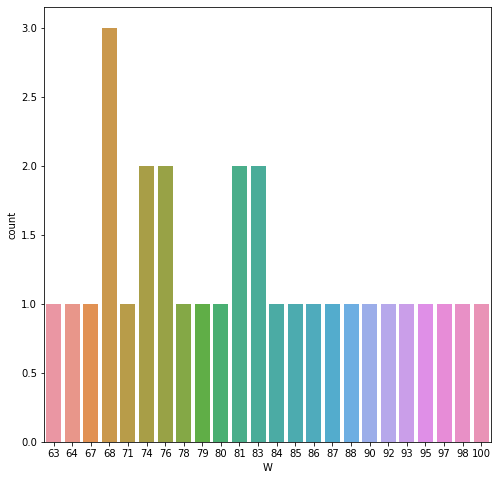

In [688]:
plt.figure(figsize=(8,8))
sns.countplot(BCS['W'])

we can predict that most of the teams have 68,74,76,81 and 83 wins.

<AxesSubplot:xlabel='SV', ylabel='count'>

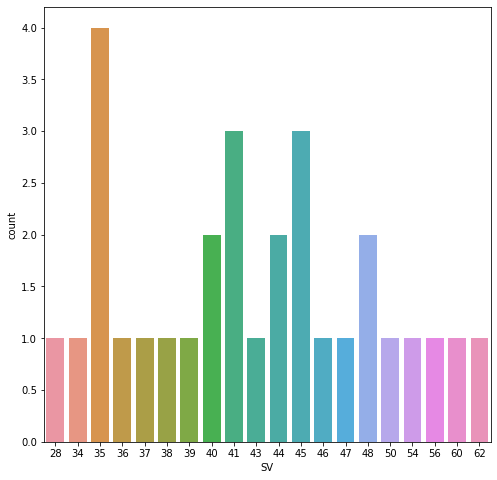

In [689]:
plt.figure(figsize=(8,8))
sns.countplot(BCS['SV'])

From above plot we can say more saves are at 35,41 and 45.

<AxesSubplot:xlabel='CG', ylabel='count'>

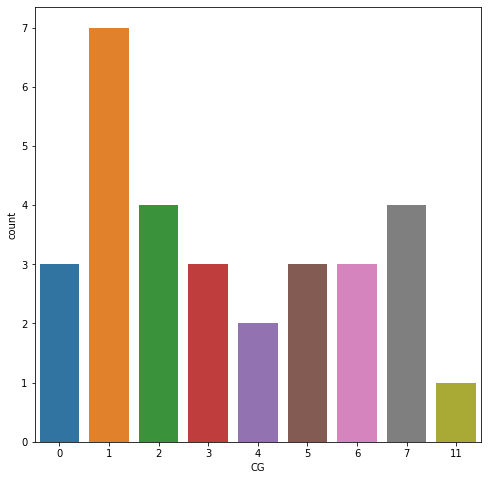

In [690]:
plt.figure(figsize=(8,8))
sns.countplot(BCS['CG'])

Observation:

7 Teams have CG 7 

4 teams are with CG 

3 and 1 team is with CG 1.

### Distribution Plot

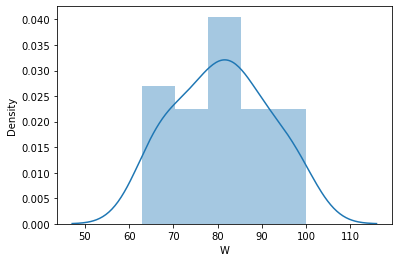

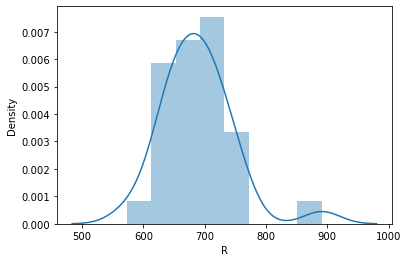

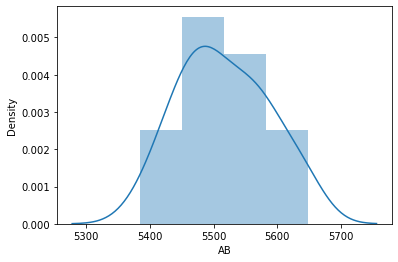

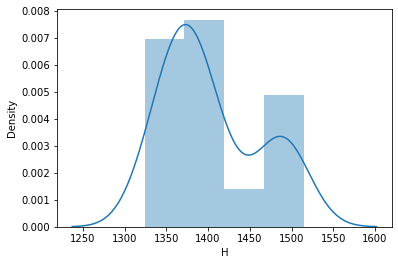

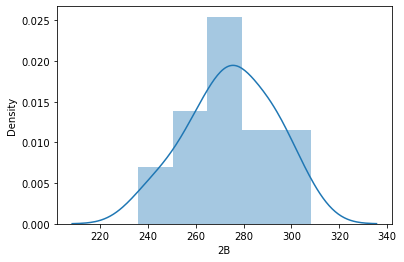

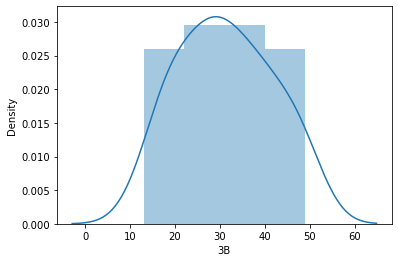

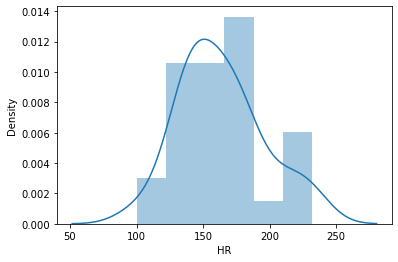

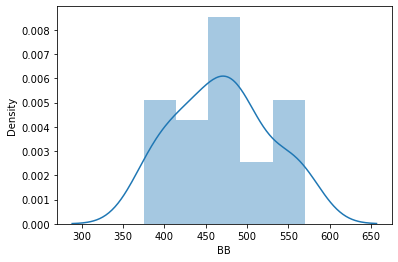

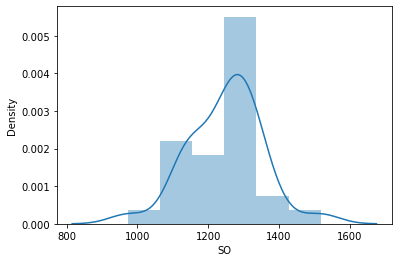

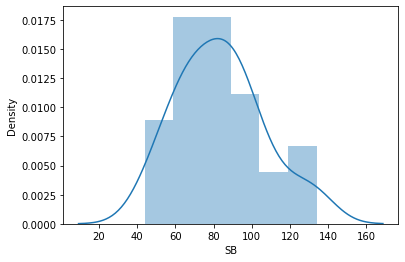

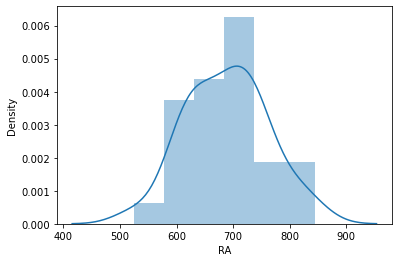

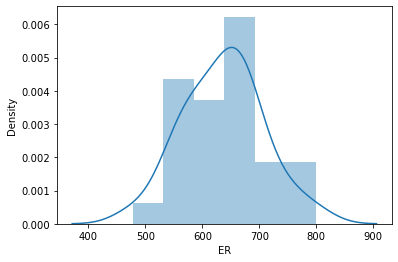

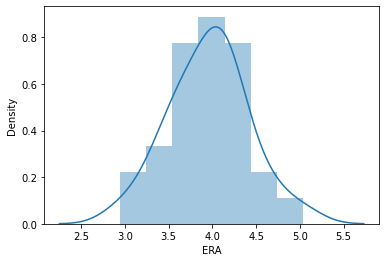

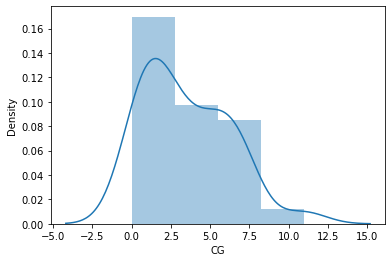

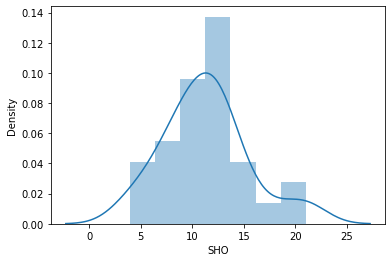

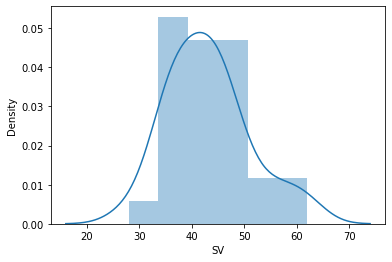

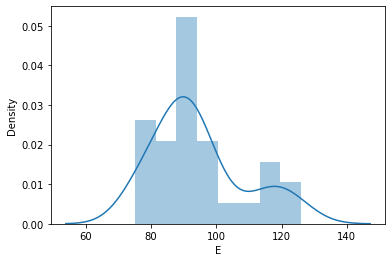

In [691]:
for i in Cols:
    sns.distplot(BCS[i])
    plt.show()

We can see that all the columns are normaly distributed and there is no skewness.

CG is rightly skeweed ,but CG is catergorical column.

H is multiskeweed column.

R is multiskeweed and leaning towards right .

### Box Plot

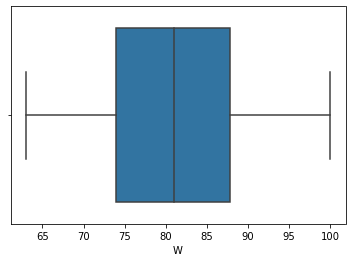

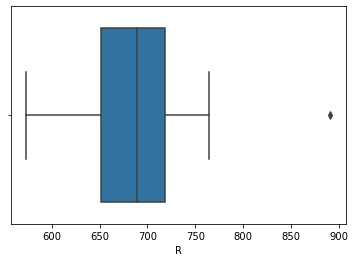

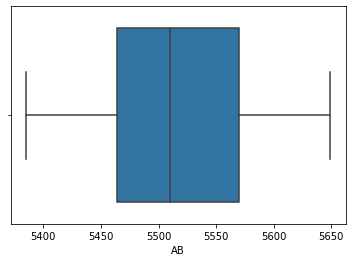

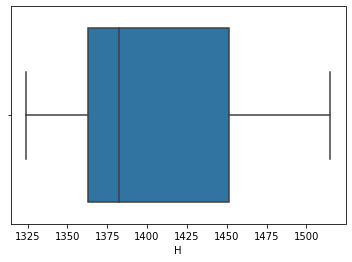

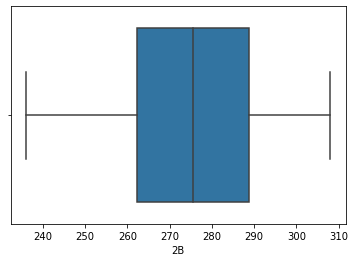

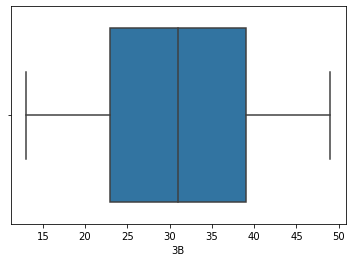

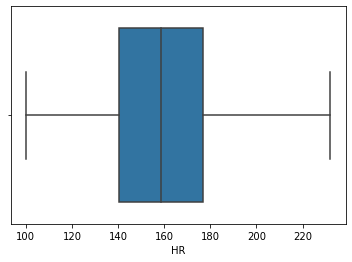

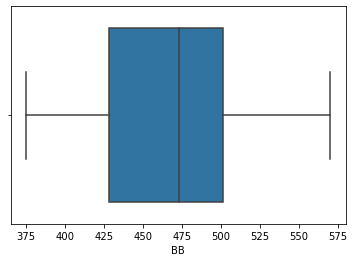

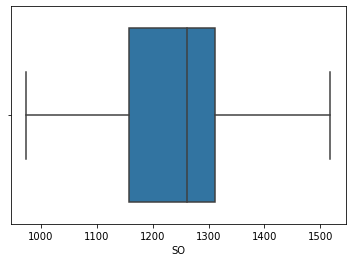

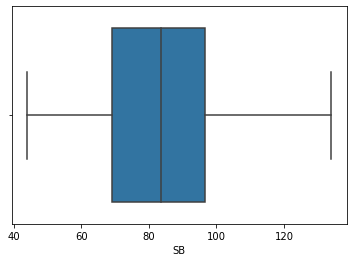

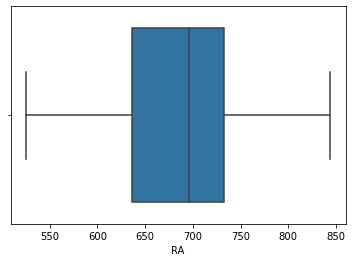

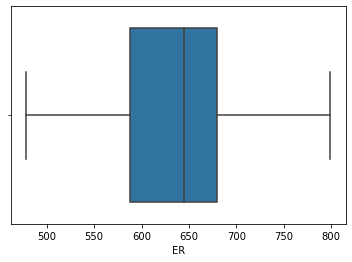

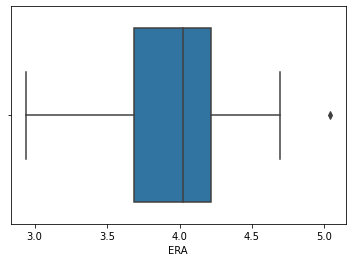

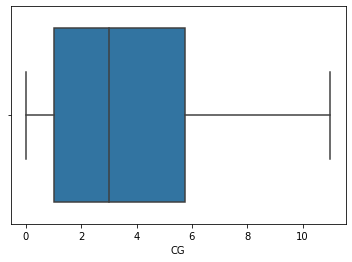

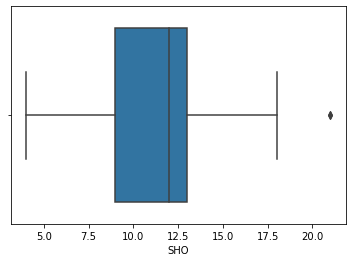

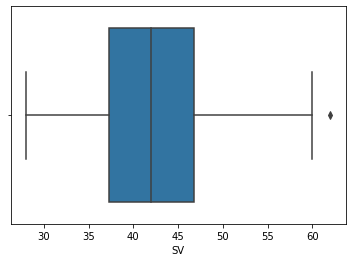

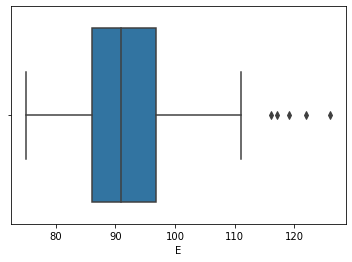

In [692]:
for i in Cols:
    sns.boxplot(BCS[i])
    plt.show()

Observation:

Outliers are present in E.

Outliers are present in ERA.

Outliers are present in SHO.

Outliers are present in SV.

### Bivariate Analysis

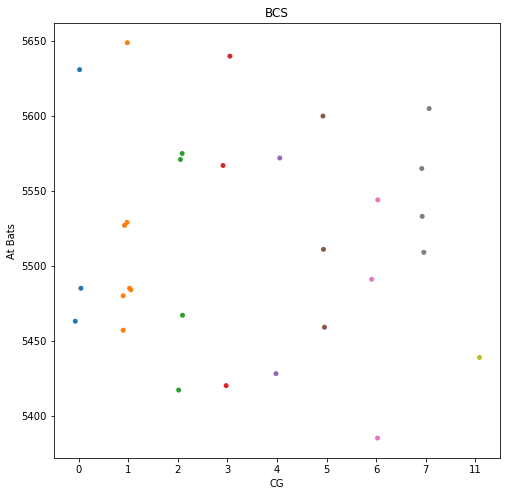

In [693]:
plt.figure(figsize=(8,8))
ax=sns.stripplot(BCS['CG'],BCS['AB'])
ax.set(xlabel='CG',ylabel='At Bats')
plt.title('BCS')
plt.show()

Observation:

From above plot we can say at bats is high for CG 0,1 and 3.

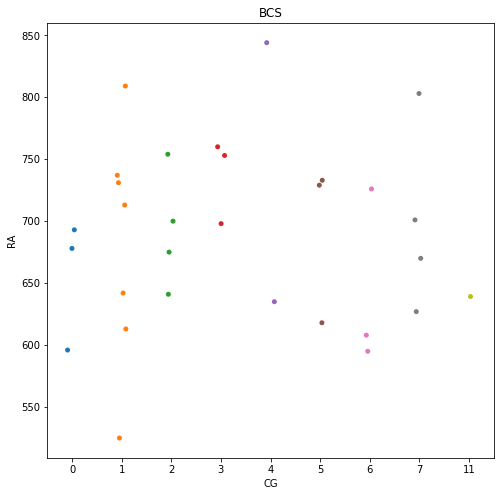

In [694]:
plt.figure(figsize=(8,8))
ax=sns.stripplot(BCS['CG'],BCS['RA'])
ax.set(xlabel='CG',ylabel='RA')
plt.title('BCS')
plt.show()

Observation:

From above plot we can say runs allowed is high for CG 1,4 and 7.

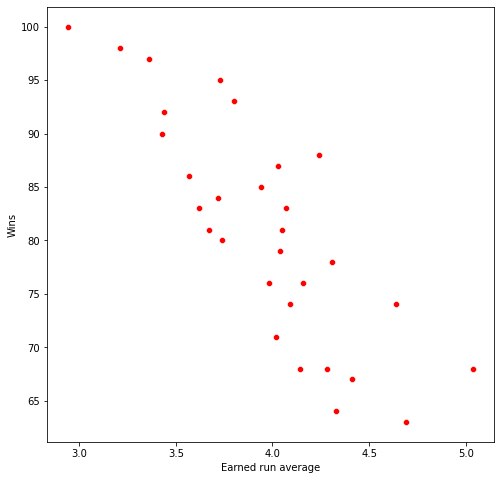

In [695]:
plt.figure(figsize=(8,8))
sns.scatterplot(BCS['ERA'],BCS['W'],palette='RdBu',color='Red')
plt.xlabel('Earned run average')
plt.ylabel('Wins')
plt.show()

Observation:

From above plot we can say predicted wins and Earned run average is negatively related.

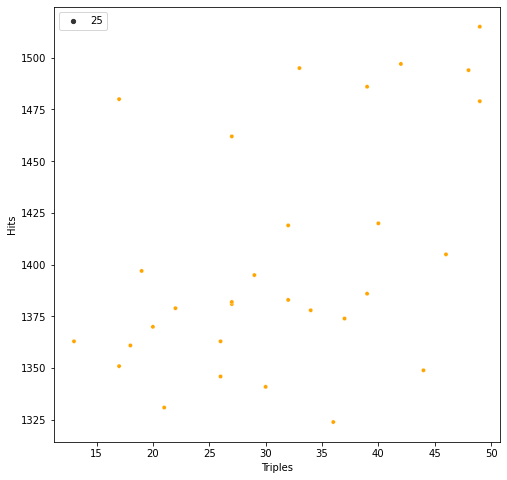

In [696]:
plt.figure(figsize=(8,8))
sns.scatterplot(BCS['3B'],BCS['H'],size=25,color='Orange')
plt.xlabel('Triples')
plt.ylabel('Hits')
plt.show()

Observation:

From above plot we can say triples and hits are not related to each other.

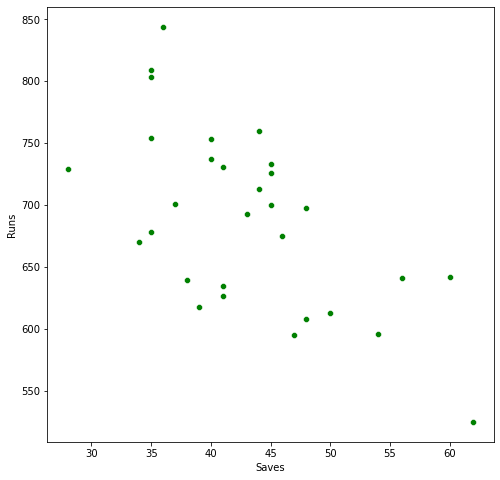

In [697]:
plt.figure(figsize=(8,8))
sns.scatterplot(BCS['SV'],BCS['RA'],color='Green')
plt.xlabel('Saves')
plt.ylabel('Runs')
plt.show()

Observation:

From above plot we can say Saves and Runs allowed have negative relationship .

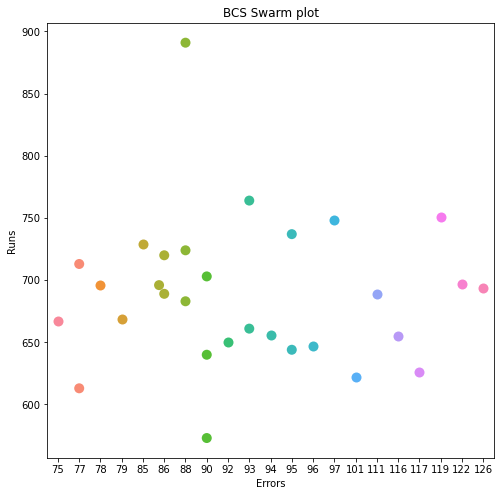

In [698]:
plt.figure(figsize=(8,8))
sns.swarmplot(x='E',y='R',data=BCS,size=10)
plt.xlabel('Errors')
plt.ylabel('Runs')
plt.title('BCS Swarm plot')
plt.show()

Observation:

From above plot we can say Errors and Runs have zero correlation.

<Figure size 720x720 with 0 Axes>

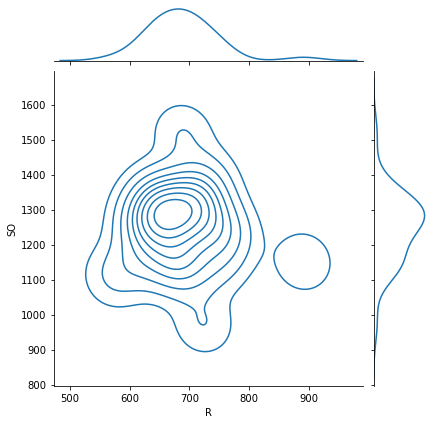

In [699]:
plt.figure(figsize=(10,10))
sns.jointplot(x='R',y='SO',data=BCS,kind='kde')
plt.xlabel('Runs')
plt.ylabel('Strike Outs')
plt.show()


Observation:

This plot is Runs with strike Outs.We can see there are more stike outs at 700 Runs.

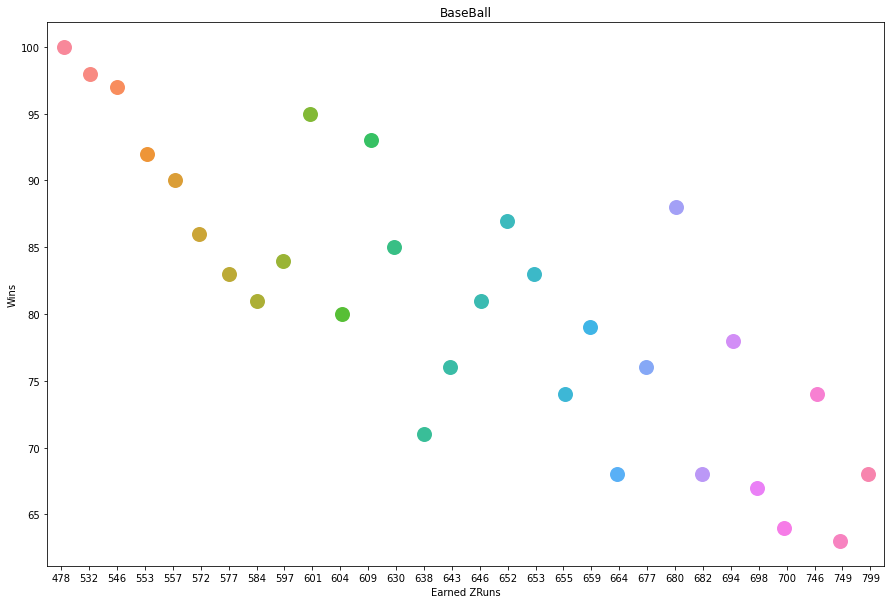

In [700]:
plt.figure(figsize=(15,10))
sns.stripplot(BCS['ER'],BCS['W'],size=15)
plt.xlabel('Earned ZRuns')
plt.ylabel('Wins')
plt.title("BaseBall")
plt.show()

Observation:

From above plot We can see in above plot that Earned runs and Wins are negatively correlated.

#### Mulivariate analysis

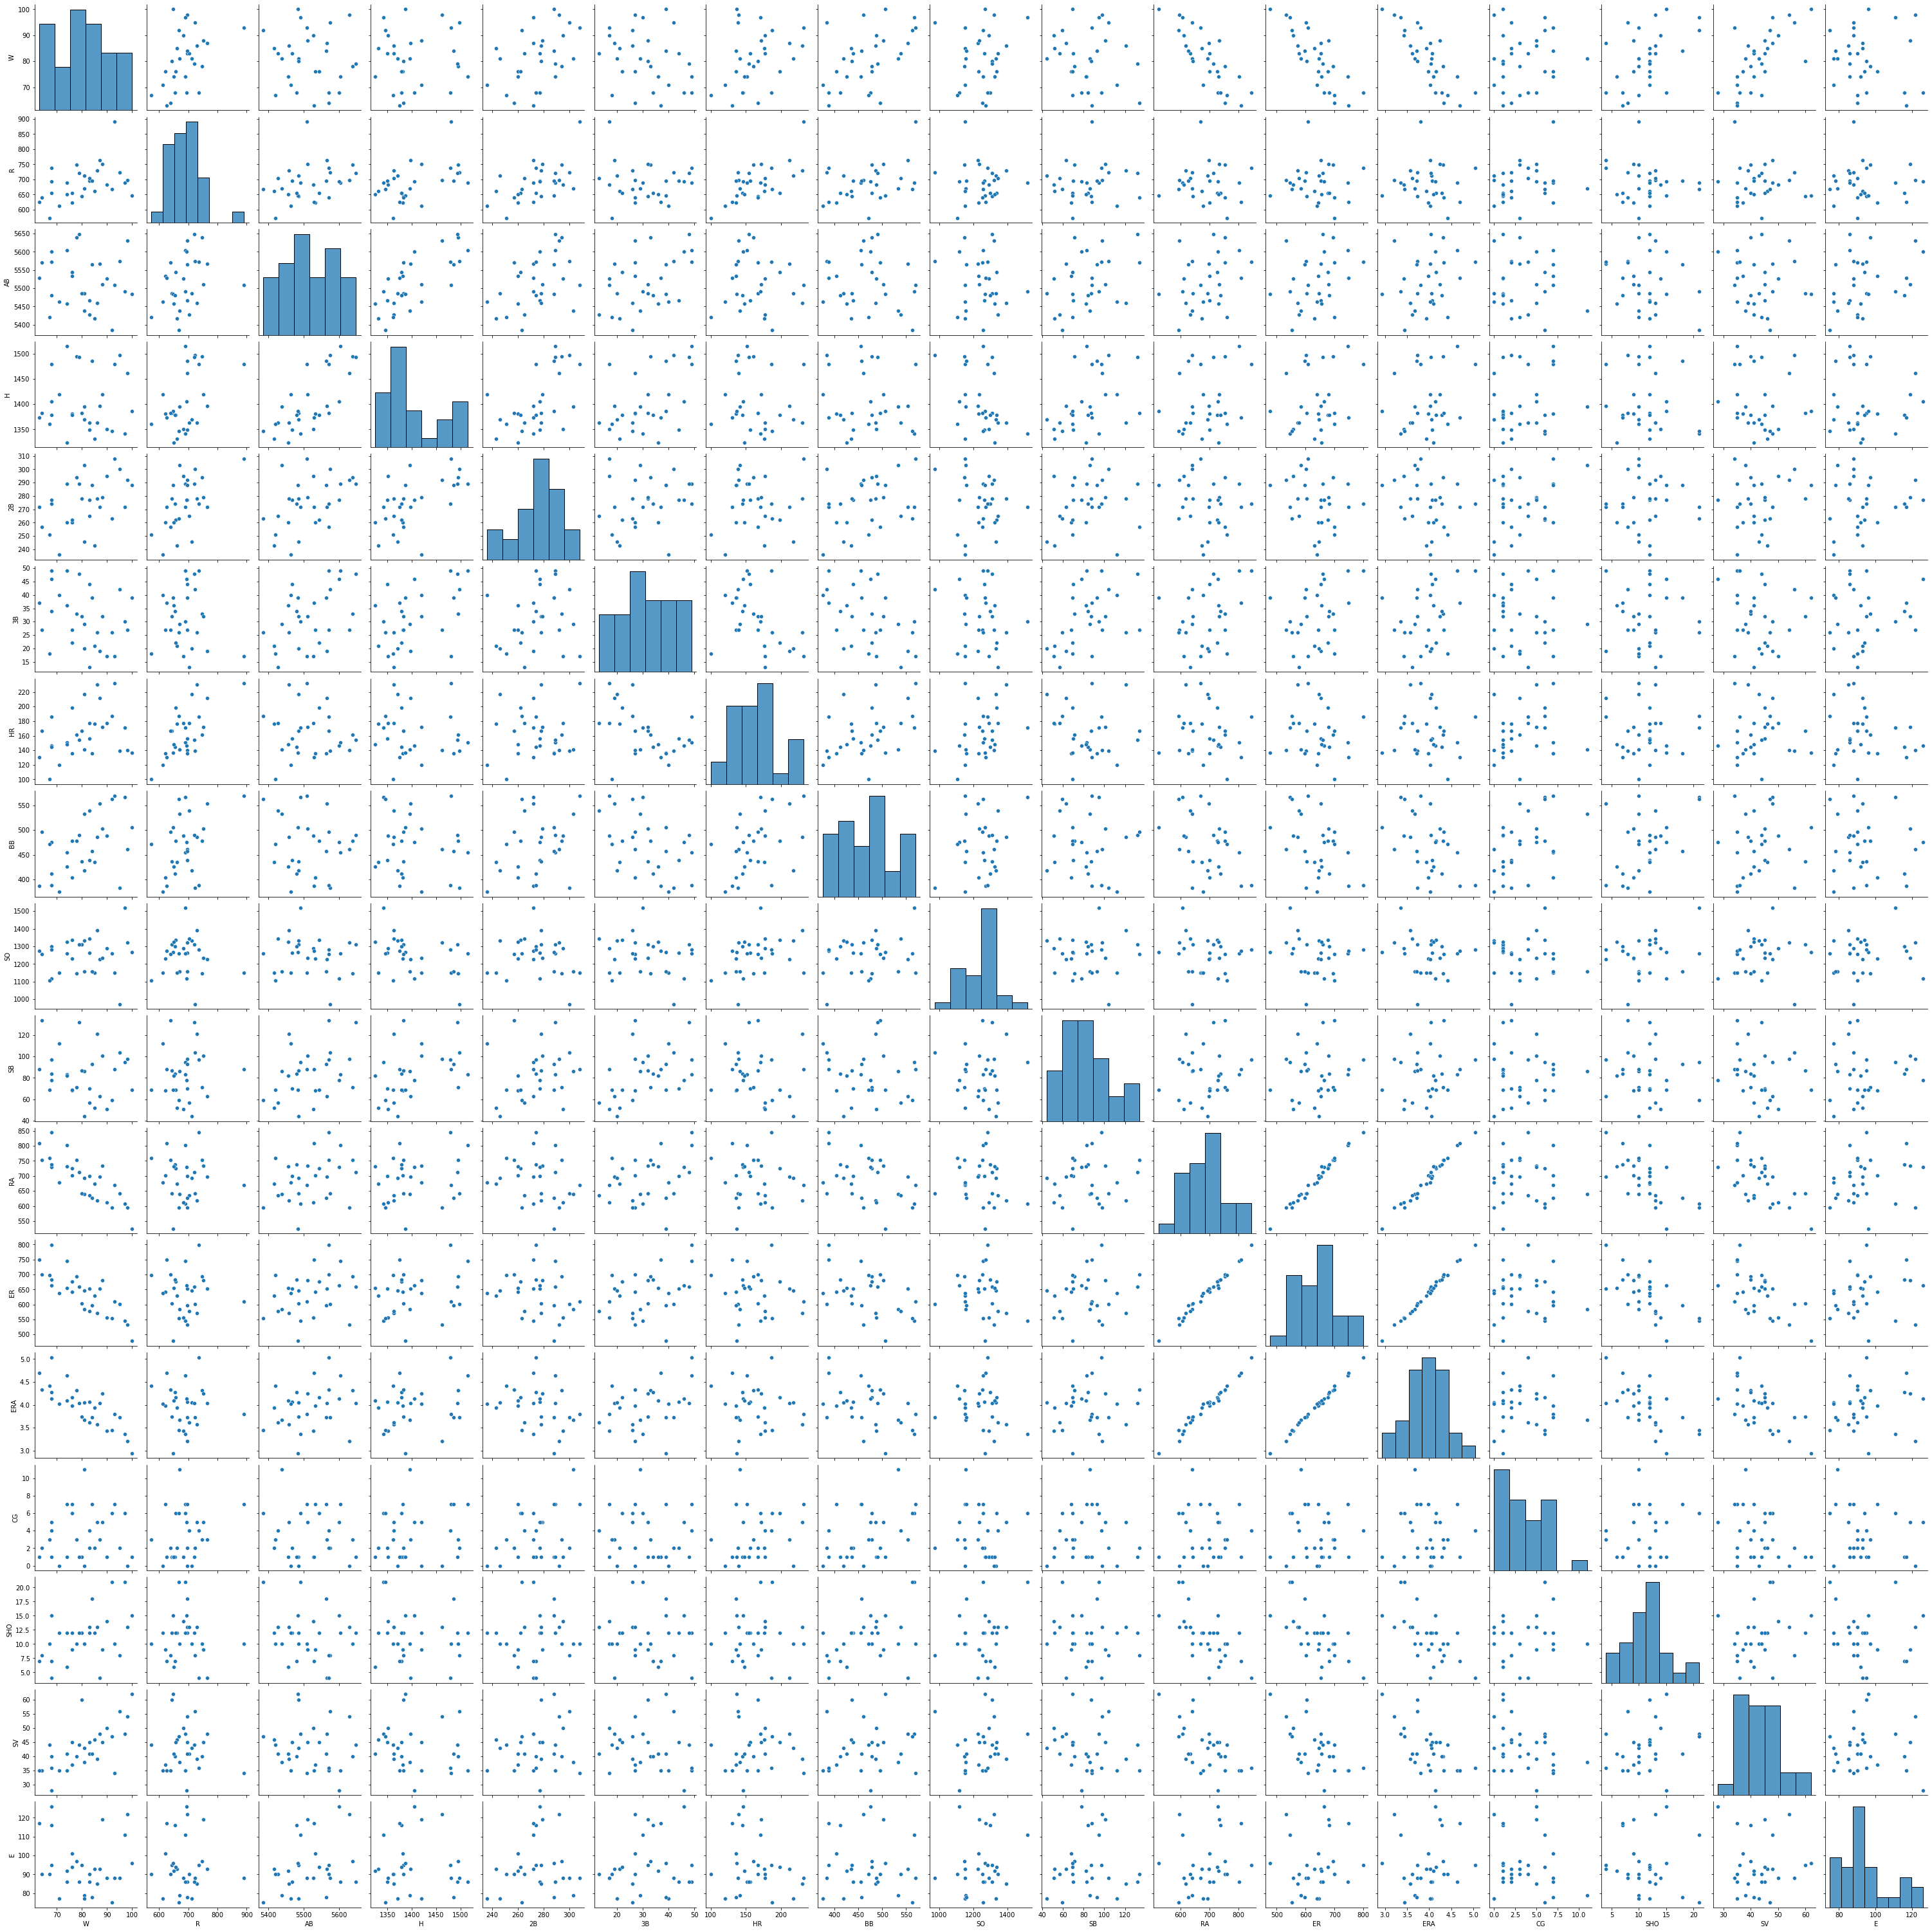

In [701]:
sns.pairplot(BCS)

### ENCODING ( We are not running this ,as model performance is not improving)

In [702]:
#from sklearn.preprocessing import OneHotEncoder

In [703]:
#OHC=OneHotEncoder(handle_unknown='ignore', sparse=False)

In [704]:
#BCS = pd.get_dummies(data=BCS, columns=['CG'])

In [705]:
#BCS

## Correlation

In [706]:
BCS.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


Above is statistical chart for correlation between all the columns in dataset.

<AxesSubplot:>

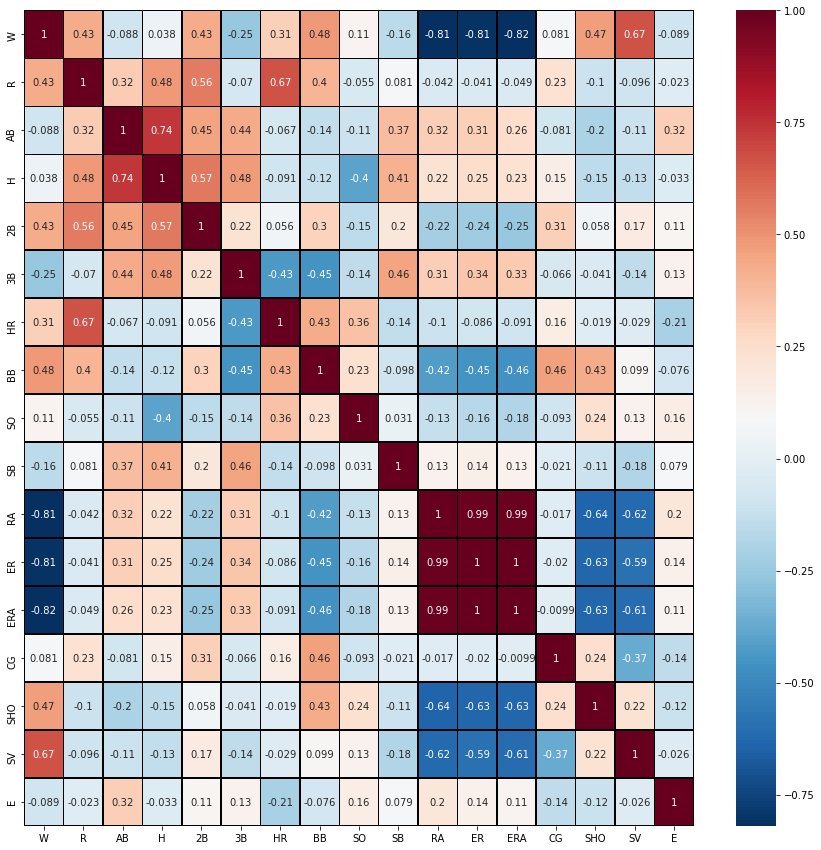

In [707]:
plt.figure(figsize=(15,15))
sns.heatmap(BCS.corr(),annot=True,cmap='RdBu_r',linewidth=0.5,linecolor='Black')

##### Heatmap for correlation between the columns makes us clear with below points:
 
1)Earned Runs Average,Runs allowed and Earned Runs are very negatively correlated with the predicted wins.

2)Earned Runs and Earned runs average are very highly correlated with Runs allowed.

3)At bats and hits is also highly correlated.

4)Shutouts and Saves are negatively correlated with runs allowed,earned runs and earned runs average.

### Top 10 correlated values

In [708]:
correlation_0=BCS.corr().abs().unstack().sort_values(kind='quicksort').dropna()
correlation_0

ERA  CG     0.009856
CG   ERA    0.009856
RA   CG     0.016659
CG   RA     0.016659
HR   SHO    0.019119
SHO  HR     0.019119
ER   CG     0.020221
CG   ER     0.020221
SB   CG     0.020783
CG   SB     0.020783
E    R      0.023262
R    E      0.023262
SV   E      0.025636
E    SV     0.025636
HR   SV     0.028540
SV   HR     0.028540
SO   SB     0.030968
SB   SO     0.030968
H    E      0.033173
E    H      0.033173
H    W      0.037612
W    H      0.037612
ER   R      0.041245
R    ER     0.041245
SHO  3B     0.041396
3B   SHO    0.041396
R    RA     0.041623
RA   R      0.041623
R    ERA    0.049281
ERA  R      0.049281
R    SO     0.054726
SO   R      0.054726
2B   HR     0.056292
HR   2B     0.056292
SHO  2B     0.057998
2B   SHO    0.057998
CG   3B     0.065898
3B   CG     0.065898
HR   AB     0.066983
AB   HR     0.066983
R    3B     0.070072
3B   R      0.070072
BB   E      0.075685
E    BB     0.075685
     SB     0.079149
SB   E      0.079149
CG   W      0.080533
W    CG     0

In [709]:
correlation_0=correlation_0[correlation_0!=1]
correlation_0

ERA  CG     0.009856
CG   ERA    0.009856
RA   CG     0.016659
CG   RA     0.016659
HR   SHO    0.019119
SHO  HR     0.019119
ER   CG     0.020221
CG   ER     0.020221
SB   CG     0.020783
CG   SB     0.020783
E    R      0.023262
R    E      0.023262
SV   E      0.025636
E    SV     0.025636
HR   SV     0.028540
SV   HR     0.028540
SO   SB     0.030968
SB   SO     0.030968
H    E      0.033173
E    H      0.033173
H    W      0.037612
W    H      0.037612
ER   R      0.041245
R    ER     0.041245
SHO  3B     0.041396
3B   SHO    0.041396
R    RA     0.041623
RA   R      0.041623
R    ERA    0.049281
ERA  R      0.049281
R    SO     0.054726
SO   R      0.054726
2B   HR     0.056292
HR   2B     0.056292
SHO  2B     0.057998
2B   SHO    0.057998
CG   3B     0.065898
3B   CG     0.065898
HR   AB     0.066983
AB   HR     0.066983
R    3B     0.070072
3B   R      0.070072
BB   E      0.075685
E    BB     0.075685
     SB     0.079149
SB   E      0.079149
CG   W      0.080533
W    CG     0

In [710]:
correlation_0_Top10=correlation_0.tail(10)
correlation_0_Top10

RA   W      0.812952
W    RA     0.812952
     ERA    0.819600
ERA  W      0.819600
RA   ERA    0.986674
ERA  RA     0.986674
RA   ER     0.991018
ER   RA     0.991018
ERA  ER     0.997248
ER   ERA    0.997248
dtype: float64

Above are top 10 highly correlated columns.

##### As after running all the model we are not getting good R2_score and RMSE ,we will drop the highly correlated column ERA.

###### As after running all the model we are not getting good R2_score and RMSE ,we will drop the highly correlated column ER and add ERA back.

In [711]:
BCS.drop('ER',axis=1,inplace=True)

###### After dropping RA also we couldnot find good model hence will add it back and not perform encoding as it is also not resulting in improvising the model performance.

In [712]:
#BCS.drop('ERA',axis=1,inplace=True)

<AxesSubplot:>

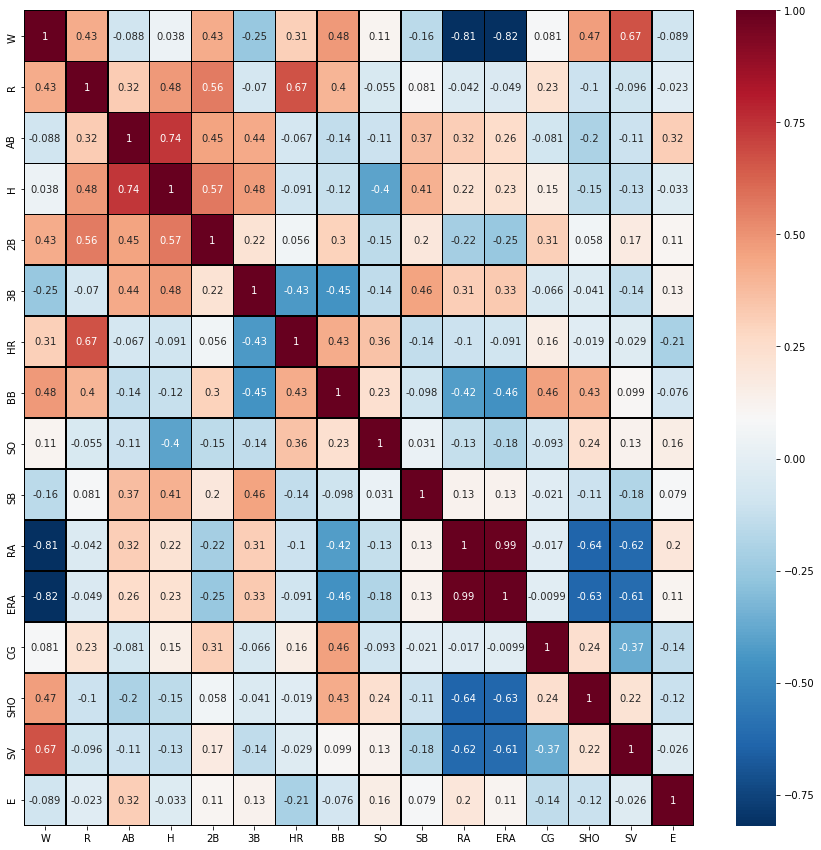

In [713]:
plt.figure(figsize=(15,15))
sns.heatmap(BCS.corr(),annot=True,cmap='RdBu_r',linewidth=0.5,linecolor='Black')

## OUTLIERS

In [714]:
ncols,nrows = (3,6)

In [715]:
BCS.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ERA',
       'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [716]:
CN=['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ERA',
       'CG', 'SHO', 'SV', 'E']

CN

['W',
 'R',
 'AB',
 'H',
 '2B',
 '3B',
 'HR',
 'BB',
 'SO',
 'SB',
 'RA',
 'ERA',
 'CG',
 'SHO',
 'SV',
 'E']

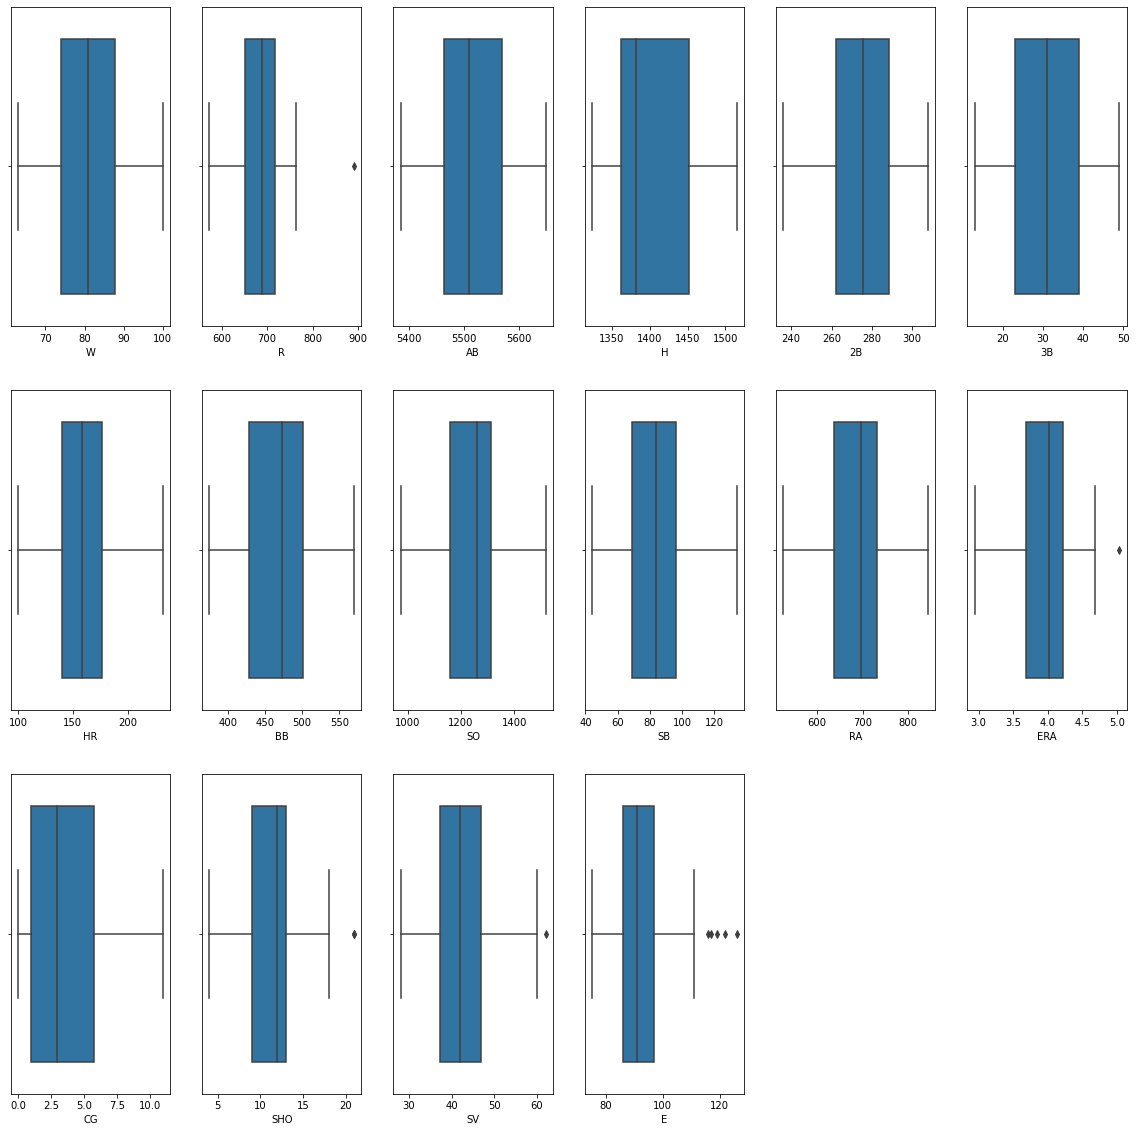

In [717]:
plt.figure(figsize=(20,20))
for index,col in enumerate(CN):
    plt.subplot(ncols,nrows,index+1)
    sns.boxplot(BCS[CN[index]])

Observation:

We can see the presence of outliers in E,SV,SHO and R .


## zscore

##### Removing the outliers by zscore method

In [718]:
z=np.abs(zscore(BCS))

In [719]:
threshold=3
print(np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [720]:
BCS_New=BCS[(z<3).all (axis=1)]

In [721]:
BCS_New

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,4.24,5,9,45,119


In [722]:
BCS_New.shape

(29, 16)

In [723]:
BCS.shape

(30, 16)

###### By zscore method we have eliminated one row from the dataset.(Without appling one hot encoder )

###### By zscore method after applying one hot encoder we loss 50% of dat hence will use quantile method to remove outliers.

## Quantile

###### We will try removing outlier with quamtile method as we are lossing lot of data in zscore method.

###### we can treat E,SHO,SV and R by soft capping method.

In [724]:
BCQ=['R','SV','SHO','E']
BCQ

['R', 'SV', 'SHO', 'E']

###### Applying Soft Capping

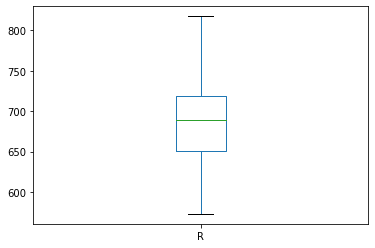

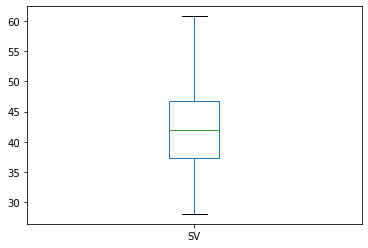

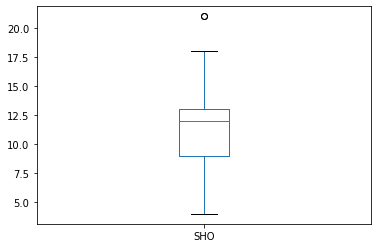

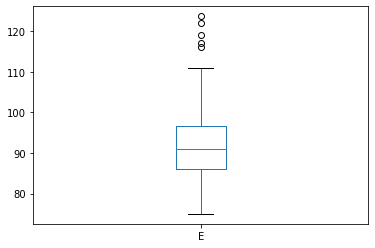

In [725]:
for i in BCQ:
    
    q4=BCS[i].quantile(0.98)
    BCS[i][BCS[i]>q4]=q4
    BCS[i].plot.box()
    plt.show()

###### Applying sofy capping major outliers are removed,we will try runnig our model.

Model isn't performing well, hence will remove outlier of E by hard capping.

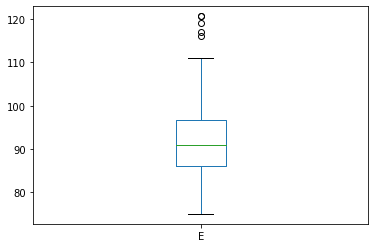

In [726]:
q4=BCS['E'].quantile(0.95)
BCS['E'][BCS['E']>q4]=q4
BCS['E'].plot.box()
plt.show()

In [727]:
BCS.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,685.778000,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,3.956333,3.466667,11.300000,43.028000,94.110000
std,10.453455,51.026943,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,0.454089,2.763473,4.120177,7.775386,13.475498
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,817.340000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,5.040000,11.000000,21.000000,60.840000,120.650000


In [728]:
BCS.shape

(30, 16)

## DATA SPLITING

In [729]:
X=BCS.drop('W',axis=1)

In [730]:
Y=BCS.iloc[:,0:1]

In [731]:
X.shape

(30, 15)

In [732]:
Y.shape

(30, 1)

### Skewness

We have to check the skewness of X.

In [733]:
X.skew()

R      0.268787
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.605470
E      0.793859
dtype: float64

H,E,SHO,SV have skewness more than 0.5 ,so we will treat them sqrt,log etc. methods.

In [734]:
X['SHO']=np.sqrt(X['SHO'])
X['SHO'].skew()

-0.061760942223412066

Skewness is now within limit for shutouts applying sqrt

In [735]:
X['SV']=np.sqrt(X['SV'])
X['SV'].skew()

0.3665648428170508

Skewness is now within limit for saves applying sqrt

In [736]:
X['E']=np.sqrt(X['E'])
X['E'].skew()

0.6762472401873565

In [737]:
X['H']=np.log(X['H'])
X['H'].skew()

0.6285536261591038

In [738]:
#X['H']=np.sqrt(X['H'])
#X['H'].skew()

In [739]:
#X_power=pt.fit_transform(X.iloc[:,2:3])
#X.iloc[:,2:3]=pd.DataFrame(X_power,columns=X.iloc[:,2:3].columns)
#X.iloc[:,2:3].skew()

In [740]:
X

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ERA,CG,SHO,SV,E
0,724.00,5575,7.311218,300,42,139,383,973,104,641,3.73,2,2.828427,7.483315,9.380832
1,696.00,5467,7.207119,277,44,156,439,1264,70,700,4.07,2,3.464102,6.708204,9.273618
2,669.00,5439,7.240650,303,29,141,533,1157,86,640,3.67,11,3.162278,6.164414,8.888194
3,622.00,5533,7.230563,260,27,136,404,1231,68,701,3.98,7,3.000000,6.082763,10.049876
4,689.00,5605,7.323171,289,49,151,455,1259,83,803,4.64,7,3.464102,5.916080,9.273618
5,817.34,5509,7.299797,308,17,232,570,1151,88,670,3.80,7,3.162278,5.830952,9.380832
6,764.00,5567,7.242082,272,19,212,554,1227,63,698,4.03,3,2.000000,6.928203,9.643651
7,713.00,5485,7.222566,246,20,217,418,1331,44,693,4.05,0,3.162278,6.557439,8.774964
8,644.00,5485,7.232010,278,32,167,436,1310,87,642,3.74,1,3.464102,7.745967,9.746794
9,748.00,5640,7.309881,294,33,161,478,1148,71,753,4.31,3,3.162278,6.324555,9.848858


from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson') 
X_power=pt.fit_transform(X.iloc[:,2:3])
X.iloc[:,2:3]=pd.DataFrame(X_power,columns=X.iloc[:,2:3].columns)

When tried to apply yeo-johnson and box cox, skewness is turning to zero.

In [741]:
#from sklearn.preprocessing import PowerTransformer
#pt=PowerTransformer(method='yeo-johnson',standardize=True) 
#X_power=pt.fit_transform(X.iloc[:,15:16])
#X.iloc[:,15:16]=pd.DataFrame(X_power,columns=X.iloc[:,15:16].columns)
#X.iloc[:,15:16].skew()

In [742]:
X.skew()

R      0.268787
AB     0.183437
H      0.628554
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ERA    0.053331
CG     0.736845
SHO   -0.061761
SV     0.366565
E      0.676247
dtype: float64

Skewness of all the columns is treated well.

## SCALING

We will apply MInMaxScaler to treat the data x.

In [743]:
from sklearn.preprocessing import MinMaxScaler

In [744]:
scaler=MinMaxScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [745]:
X

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ERA,CG,SHO,SV,E
0,0.617991,0.719697,0.911305,0.888889,0.805556,0.295455,0.041026,0.000000,0.666667,0.363636,0.376190,0.181818,0.320776,0.873755,0.310082
1,0.503397,0.310606,0.138813,0.569444,0.861111,0.424242,0.328205,0.533945,0.288889,0.548589,0.538095,0.181818,0.566915,0.564761,0.263946
2,0.392895,0.204545,0.387635,0.930556,0.444444,0.310606,0.810256,0.337615,0.466667,0.360502,0.347619,1.000000,0.450046,0.347982,0.098088
3,0.200540,0.560606,0.312786,0.333333,0.388889,0.272727,0.148718,0.473394,0.266667,0.551724,0.495238,0.636364,0.387210,0.315432,0.597989
4,0.474748,0.833333,1.000000,0.736111,1.000000,0.386364,0.410256,0.524771,0.433333,0.871473,0.809524,0.636364,0.566915,0.248985,0.263946
5,1.000000,0.469697,0.826553,1.000000,0.111111,1.000000,1.000000,0.326606,0.488889,0.454545,0.409524,0.636364,0.450046,0.215049,0.310082
6,0.781698,0.689394,0.398267,0.500000,0.166667,0.848485,0.917949,0.466055,0.211111,0.542320,0.519048,0.272727,0.000000,0.652463,0.423180
7,0.572972,0.378788,0.253442,0.138889,0.194444,0.886364,0.220513,0.656881,0.000000,0.526646,0.528571,0.000000,0.450046,0.504659,0.049363
8,0.290579,0.378788,0.323525,0.583333,0.527778,0.507576,0.312821,0.618349,0.477778,0.366771,0.380952,0.090909,0.566915,0.978460,0.467565
9,0.716215,0.965909,0.901384,0.805556,0.555556,0.462121,0.528205,0.321101,0.300000,0.714734,0.652381,0.272727,0.450046,0.411821,0.511486


## MODEL

In [746]:
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.30,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    predf=LR.predict(x_test)
    ac=r2_score(y_test,predf)
    
    if ac>maxAccu:
        maxAccu=ac
        maxRS=i
        
print('Best r2_score at x is',maxAccu*100,'at random state',maxRS)      

Best r2_score at x is 92.66194971689659 at random state 144


We can select random state 527 as we are getting best r2_score of 91.2921% for linear regression (without droping any column)


Best r2_score at x is 91.5476792018226 at random state 104 after dropping ERA and RA columns.


Best r2_score at x is 80.16423955989816 at random state 135 after applying one hot encoder.

### Model: Linear Regression

In [747]:
LR.coef_

array([[ 33.41504009,   6.77508053,  -8.55922251,  -6.18550418,
          4.03069184,  -1.12819364,  -1.00493863, -17.44104526,
         -0.64730558,  31.82328422, -53.82143452,   4.78465833,
         12.97265883,  11.06821315,   0.76692276]])

In [748]:
predf=LR.predict(x_test)

print('the predicted value :',predf)
print('The actual value:',y_test)

the predicted value : [[92.19621093]
 [84.67335682]
 [84.58723517]
 [86.97510729]
 [92.9821249 ]
 [88.66390397]
 [69.46558489]
 [89.05071006]
 [93.53600812]]
The actual value:       W
17   97
12   85
27   79
9    78
15  100
14   68
19   64
26   84
16   98


Above are the predicted and actual values with linear regression model wwithout hyper tunning.

In [749]:
print('error')

print('Mean absolute error',mean_absolute_error(y_test,predf))
print('Mean squared error',mean_squared_error(y_test,predf))


print('Root mean squared error',np.sqrt(mean_squared_error(y_test,predf)))

error
Mean absolute error 6.928315623505128
Mean squared error 76.2788716542472
Root mean squared error 8.733777627936677


Root Mean Squared Error is 8.729062344726625 which is low and r2_score is 93.06% whcich is good.So we can say our model is performing well .

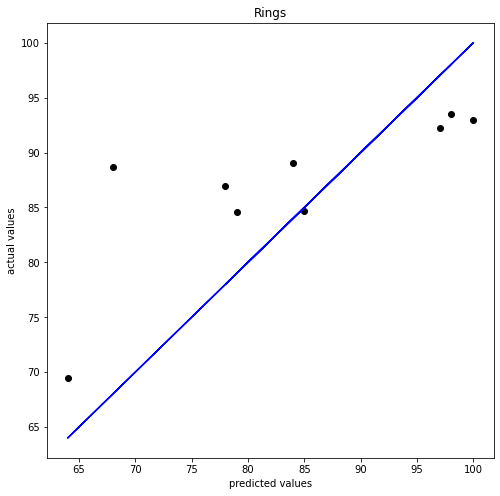

In [750]:
plt.figure(figsize=(8,8))
plt.scatter(x=y_test,y=predf,color='k')
plt.plot(y_test,y_test,color='b')
plt.xlabel('predicted values')
plt.ylabel('actual values')
plt.title('Rings')
plt.show()

### Hyper Parameter Tunning for Linear Regression

In [751]:
from sklearn.model_selection import GridSearchCV

model =LinearRegression()
parameters = {'fit_intercept':[True,False],'copy_X':[True, False]}
grid = GridSearchCV(model,parameters,cv=2)
grid.fit(x_train,y_train)
grid.best_params_

{'copy_X': True, 'fit_intercept': True}

###### Applying the best parameters for running the linear regression model.

In [752]:
predx=grid.predict(x_test)
R2_score=r2_score(y_test,predx)
R2_score

0.48691341936605026

The r2_score using linear regression using hyper parameter tunning at CV=5  is: 48.7468
    
The r2_score using linear regression using hyper parameter tunning at CV=3  is: 48.74746        

##### R2_score for best parameters using hyper tunning for linear regression model is 48.75% which has reduced alot .

In [753]:
LR.coef_

array([[ 33.41504009,   6.77508053,  -8.55922251,  -6.18550418,
          4.03069184,  -1.12819364,  -1.00493863, -17.44104526,
         -0.64730558,  31.82328422, -53.82143452,   4.78465833,
         12.97265883,  11.06821315,   0.76692276]])

Coef are not related to each other

In [754]:
y_pred=LR.predict(x_test)

print('the predicted value :',predx)
print('The actual value:',y_test)

the predicted value : [[92.19621093]
 [84.67335682]
 [84.58723517]
 [86.97510729]
 [92.9821249 ]
 [88.66390397]
 [69.46558489]
 [89.05071006]
 [93.53600812]]
The actual value:       W
17   97
12   85
27   79
9    78
15  100
14   68
19   64
26   84
16   98


Above are the predicted values.

In [755]:
print('Error')

print('Mean absolute error',mean_absolute_error(y_test,predx))
print('Mean squared error',mean_squared_error(y_test,predx))
print('Root mean squared error',np.sqrt(mean_squared_error(y_test,predx)))

Error
Mean absolute error 6.928315623505128
Mean squared error 76.2788716542472
Root mean squared error 8.733777627936677


##### Applying hyper parameter tunning for linear  regularization our score is 48.74%.

Also MAE,MSE and RMSE are are reduced after applying hyper parameter tunning:

Mean absolute error 6.947303710209746
Mean squared error 76.19652941812427
Root mean squared error 8.729062344726625

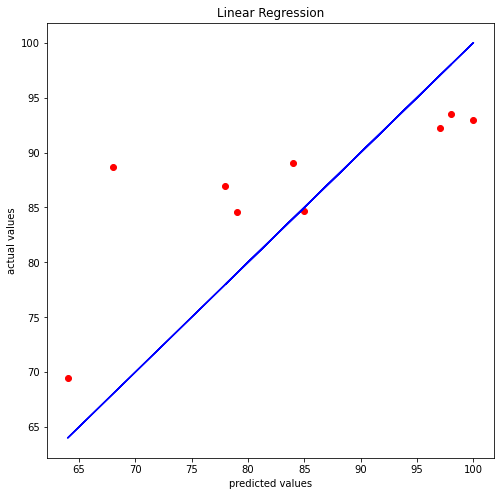

In [756]:
plt.figure(figsize=(8,8))
plt.scatter(x=y_test,y=predx,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('predicted values')
plt.ylabel('actual values')
plt.title('Linear Regression')
plt.show()

## Regularization

In [757]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet,LassoCV,RidgeCV

### Lasso

In [758]:
#will find the best alpha constant using below code
alphas=np.random.uniform(low=0,high=50,size=(50,))

In [759]:
lassocv=LassoCV(alphas=alphas,cv=6,max_iter=1000,normalize=True)
lassocv.fit(x_train,y_train)

LassoCV(alphas=array([11.57283391, 33.4663192 ,  2.05938564, 41.49357343, 14.0570115 ,
       30.44240592, 39.24075202,  7.37620944, 31.36276646, 40.50106432,
       38.95197313, 19.05025574, 39.20861108,  0.24387971, 30.36143228,
       47.64136026,  7.06107539, 47.99639427,  1.52898923, 12.35602864,
       20.93596672, 20.31840383, 13.22652727, 46.12646569, 23.57429597,
       31.04190901, 46.47018872, 13.94570424, 35.94153502, 32.85168485,
        4.6612136 ,  0.29468544, 17.72945786, 46.50374415, 48.88627177,
       18.45459105, 41.64848929, 17.31427354, 47.99152461,  9.84597711,
       41.94332336, 34.57255895, 45.15874432,  8.70037707, 41.69280961,
       12.1510008 , 36.08394819, 26.03672004, 46.11255219, 20.30465614]),
        cv=6, normalize=True)

In [760]:
#The best alpha constant
lassocv.alpha_

0.24387971171882517

In [761]:
ls=Lasso(alpha=lassocv.alpha_)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
print('The r2_score using lasso regularization is:',r2_score(y_test,pred_ls)*100)

The r2_score using lasso regularization is: 69.48023422274599


The r2_score using lasso regularization is: 70.99079231087839 without hyper tunning.

In [762]:
print('Error')

print('Mean absolute error',mean_absolute_error(y_test,pred_ls))
print('Mean squared error',mean_squared_error(y_test,pred_ls))


print('Root mean squared error',np.sqrt(mean_squared_error(y_test,pred_ls)))

Error
Mean absolute error 6.098922655626631
Mean squared error 45.37271845551763
Root mean squared error 6.735927438409475


Errors are higher as compared to linear regression model and also r2_score is low.

### Hyper tunning for Lasso regularization

##### At CV=2

In [763]:
from sklearn.model_selection import GridSearchCV
ls=Lasso()
param= {'alpha':[0.0001,0.001,0.01,0.05,0.1,0.2,0.4,0.6,0.8,1.0,2.0,5.0,10.0,100.0]}

model_cvls=GridSearchCV(estimator=ls,param_grid=param,scoring='neg_mean_absolute_error',cv=2,return_train_score=True,verbose=1)

model_cvls.fit(x_train,y_train)
model_cvls.best_params_

Fitting 2 folds for each of 14 candidates, totalling 28 fits


{'alpha': 0.05}

In [764]:
ls=Lasso(alpha=0.05)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_lss=ls.predict(x_test)
print('The r2_score using lasso is:',r2_score(y_test,pred_lss)*100,'at cross fold 2')

The r2_score using lasso is: 70.84280838265089 at cross fold 2


In [765]:
print('Error')

print('Mean absolute error',mean_absolute_error(y_test,pred_lss))
print('Mean squared error',mean_squared_error(y_test,pred_lss))


print('Root mean squared error',np.sqrt(mean_squared_error(y_test,pred_lss)))

Error
Mean absolute error 6.1485221301754995
Mean squared error 43.34702487112567
Root mean squared error 6.583845750860637


The r2_score using lasso is: 70.84280838265089 at cross fold 2.

##### At CV=9

In [766]:
from sklearn.model_selection import GridSearchCV
ls=Lasso()
param= {'alpha':[0.0001,0.001,0.01,0.05,0.1,0.2,0.4,0.6,0.8,1.0,2.0,5.0,10.0,100.0]}

model_cvls=GridSearchCV(estimator=ls,param_grid=param,scoring='neg_mean_absolute_error',cv=9,return_train_score=True,verbose=1)

model_cvls.fit(x_train,y_train)
model_cvls.best_params_

Fitting 9 folds for each of 14 candidates, totalling 126 fits


{'alpha': 0.001}

In [767]:
ls=Lasso(alpha=0.001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_la=ls.predict(x_test)
print('The r2_score using lasso is:',r2_score(y_test,pred_la)*100,'at cross fold 9')

The r2_score using lasso is: 48.470930182233815 at cross fold 9


The r2_score using lasso is: 48.50650838271752 at cross fold 9

In [768]:
print('Error')

print('Mean absolute error',mean_absolute_error(y_test,pred_la))
print('Mean squared error',mean_squared_error(y_test,pred_la))


print('Root mean squared error',np.sqrt(mean_squared_error(y_test,pred_la)))

Error
Mean absolute error 6.999820287004106
Mean squared error 76.60655046241239
Root mean squared error 8.752516807319617


##### At CV=7

In [769]:
from sklearn.model_selection import GridSearchCV
ls=Lasso()
param= {'alpha':[0.0001,0.001,0.01,0.05,0.1,0.2,0.4,0.6,0.8,1.0,2.0,5.0,10.0,100.0]}

model_cvls=GridSearchCV(estimator=ls,param_grid=param,scoring='neg_mean_absolute_error',cv=8,return_train_score=True,verbose=1)

model_cvls.fit(x_train,y_train)
model_cvls.best_params_

Fitting 8 folds for each of 14 candidates, totalling 112 fits


{'alpha': 0.05}

In [770]:
ls=Lasso(alpha=0.05)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_lo=ls.predict(x_test)
print('The r2_score using lasso is:',r2_score(y_test,pred_lo)*100,'at cross fold 8')

The r2_score using lasso is: 70.84280838265089 at cross fold 8


The r2_score using lasso is: 70.84280838265089 at cross fold 8 .

In [771]:
print('Error')

print('Mean absolute error',mean_absolute_error(y_test,pred_lo))
print('Mean squared error',mean_squared_error(y_test,pred_lo))
print('Root mean squared error',np.sqrt(mean_squared_error(y_test,pred_lo)))

Error
Mean absolute error 6.1485221301754995
Mean squared error 43.34702487112567
Root mean squared error 6.583845750860637


The r2_score using lasso is: 70.84280838265089 at cross fold 8.

We are getting less r2_score as we increase the cross folds.

###### For Lasso best R2_score we could achive is 70.84 at alpha = 0.05 and cross folds 2.

Error
Mean absolute error 6.1485221301754995

Mean squared error 43.34702487112567

Root mean squared error 6.583845750860637


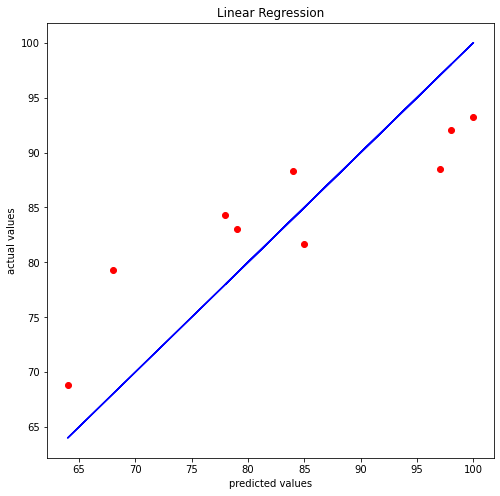

In [772]:
plt.figure(figsize=(8,8))
plt.scatter(x=y_test,y=pred_lss,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('predicted values')
plt.ylabel('actual values')
plt.title('Linear Regression')
plt.show()

### Ridge 

In [773]:
#will find the best alpha constant using below code
alphas=np.random.uniform(low=0,high=10,size=(50,))

In [774]:
ridgecv=RidgeCV(alphas=alphas,cv=6,normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([1.07760873, 9.83228219, 2.22590821, 1.94406831, 4.83372054,
       9.36420959, 2.47555132, 9.70698079, 3.84810733, 3.23853941,
       9.18469175, 3.6485405 , 3.19114502, 5.48769536, 8.71891541,
       9.72102499, 2.89517444, 4.15692099, 6.64379081, 6.39650817,
       1.87065821, 2.69164108, 3.99662747, 6.35922976, 3.13773741,
       9.33349231, 7.0550856 , 3.40201459, 2.44886166, 9.22724394,
       9.07222262, 8.40023094, 9.39254131, 0.19480419, 4.79771716,
       7.2114751 , 5.41954992, 3.10880472, 0.5613889 , 8.15370309,
       4.70930818, 5.79591156, 2.45307821, 3.63784684, 5.74157483,
       8.1880961 , 4.08786947, 6.59515017, 1.81926921, 4.98258689]),
        cv=6, normalize=True)

In [775]:
#the best alpha constant for ridgecv
ridgecv.alpha_

2.4488616613102367

In [776]:
ridge_model=Ridge(ridgecv.alpha_)
ridge_model.fit(x_train,y_train)
ridge_model.score(x_train,y_train)
predrd=ridge_model.predict(x_test)
print('The r2_score using ridge is:',r2_score(y_test,predrd)*100)

The r2_score using ridge is: 39.99000081878904


In [777]:
print('error')

print('mean absolute error',mean_absolute_error(y_test,predrd))
print('mean squared error',mean_squared_error(y_test,predrd))


print('root mean squared error',np.sqrt(mean_squared_error(y_test,predrd)))

error
mean absolute error 8.115772654994782
mean squared error 89.21486544940029
root mean squared error 9.445362113196099


### Hyper parameter tunning for Ridge

In [778]:
from sklearn.model_selection import GridSearchCV
rd=Ridge()
param= {'alpha':[0.0001,0.00001,0.01,0.05,0.1,0.2,0.4,0.6]}

model_cvrd=GridSearchCV(estimator=rd,param_grid=param,scoring='neg_mean_absolute_error',cv=4,return_train_score=True,verbose=1)

model_cvrd.fit(x_train,y_train)
model_cvrd.best_params_

Fitting 4 folds for each of 8 candidates, totalling 32 fits


{'alpha': 0.05}

In [779]:
rd=Ridge(alpha=0.05)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
pred_rd=rd.predict(x_test)
print('The r2_score using ridge is:',r2_score(y_test,pred_rd)*100)

The r2_score using ridge is: 56.63744972187047


##### R2_score appling hyper parameter tunning for ridge regularization is 56.629%

In [780]:
print('error')

print('mean absolute error',mean_absolute_error(y_test,pred_rd))
print('mean squared error',mean_squared_error(y_test,pred_rd))


print('root mean squared error',np.sqrt(mean_squared_error(y_test,pred_rd)))

error
mean absolute error 6.896363470313948
mean squared error 64.46565808015256
root mean squared error 8.029050882897216


In [781]:
#Predicted and actual values of y_test appling ridge method.
y_predrd=rd.predict(x_test)

print('the predicted value :',y_predrd)
print('The actual value:',y_test)

the predicted value : [[89.48122477]
 [83.05046481]
 [83.07449537]
 [85.39687873]
 [94.56920892]
 [85.56391557]
 [69.74390274]
 [89.55319823]
 [91.16422091]]
The actual value:       W
17   97
12   85
27   79
9    78
15  100
14   68
19   64
26   84
16   98


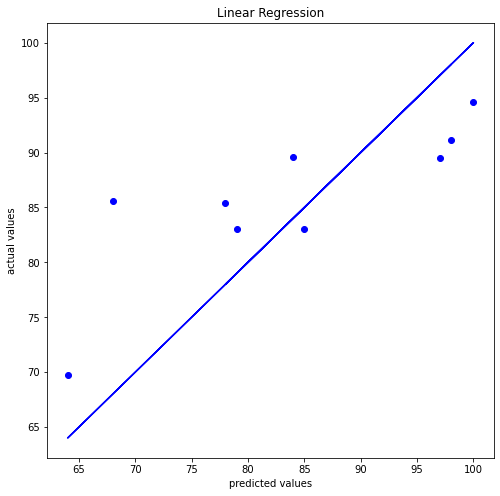

In [782]:
plt.figure(figsize=(8,8))
plt.scatter(x=y_test,y=pred_rd,color='b')
plt.plot(y_test,y_test,color='b')
plt.xlabel('predicted values')
plt.ylabel('actual values')
plt.title('Linear Regression')
plt.show()

### RandomForestRegressor

In [783]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(x_train,y_train)
predrdr=rdr.predict(x_test)
print('The r2_score using ridge is:',r2_score(y_test,predrdr)*100)   

The r2_score using ridge is: 48.6918086696562


In [784]:
print('error')

print('Mean absolute error',mean_absolute_error(y_test,predrdr))
print('Mean squared error',mean_squared_error(y_test,predrdr))


print('Root mean squared error',np.sqrt(mean_squared_error(y_test,predrdr)))

error
Mean absolute error 7.142222222222222
Mean squared error 76.27817777777778
Root mean squared error 8.733737904115156


We are getting high Root mean squared error ,mean squared error and mean absolute error for random forest regressor model compared to other models.

R2_score for random forest regressor model is 52.12% which is also low than other models.

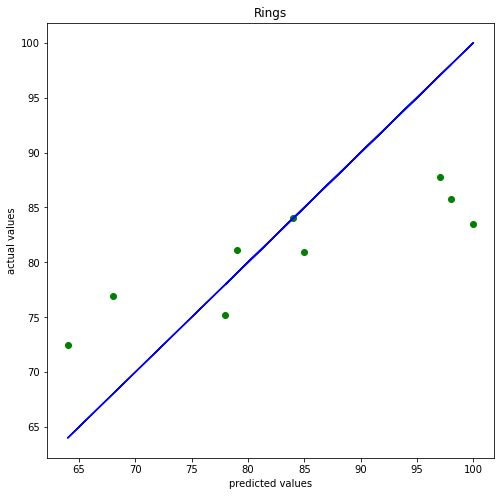

In [785]:
plt.figure(figsize=(8,8))
plt.scatter(x=y_test,y=predrdr,color='g')
plt.plot(y_test,y_test,color='b')
plt.xlabel('predicted values')
plt.ylabel('actual values')
plt.title('Rings')
plt.show()

### Hyperparameter Tunning for Random Forest Regressor

In [786]:
%%time
modelr =RandomForestRegressor()
parameters = {
    
    'max_depth': [10, 20, 30, 40, 50, 60],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4,5],
 'min_samples_split': [2, 5, 10,12]
             }

gridrfr = GridSearchCV(modelr,parameters,cv=3)
gridrfr.fit(x_train,y_train)
gridrfr.best_params_

Wall time: 2min 21s


{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5}

In [787]:
predrfr=gridrfr.predict(x_test)
R2_score=r2_score(y_test,predrfr)
print('The R2_score for cv=3 is :',(R2_score*100))

The R2_score for cv=3 is : 37.499223704290365


The R2_score for cv=5 is : 30.778652296126296
    
The R2_score for cv=3 is : 41.29038328509329 

The R2_score for cv=7 is : 32.31393299997267

In [788]:
print('Error')

print('Mean absolute error',mean_absolute_error(y_test,predrfr))
print('Mean squared error',mean_squared_error(y_test,predrfr))


print('Root mean squared error',np.sqrt(mean_squared_error(y_test,predrfr)))

Error
Mean absolute error 7.986327641494309
Mean squared error 92.91782075962165
Root mean squared error 9.63938902418725


After Hyper parameter tunning of random forest classifier our score is reducing. .

Error
Mean absolute error 8.13111111111111
Mean squared error 97.42408888888885
Root mean squared error 9.870364172050028

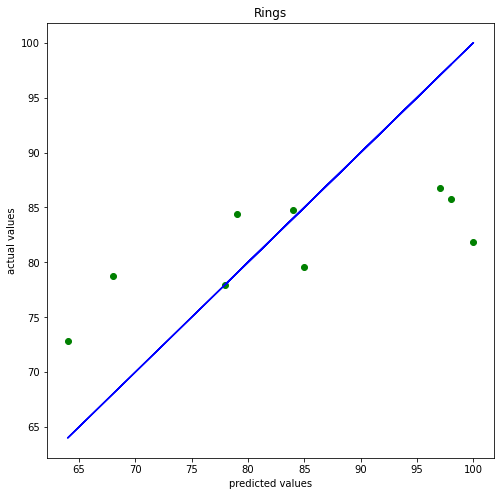

In [789]:
plt.figure(figsize=(8,8))
plt.scatter(x=y_test,y=predrfr,color='g')
plt.plot(y_test,y_test,color='b')
plt.xlabel('predicted values')
plt.ylabel('actual values')
plt.title('Rings')
plt.show()

### XGBoost Regressor Model

In [790]:
XGB = XGBRegressor()
XGB.fit(x_train,y_train)
pred_xgb=XGB.predict(x_test)
print('The r2_score using ridge is:',r2_score(y_test,pred_xgb)*100)

The r2_score using ridge is: 22.706325069684652


In [791]:
print('Error')

print('Mean absolute error',mean_absolute_error(y_test,pred_xgb))
print('Mean squared error',mean_squared_error(y_test,pred_xgb))
print('Root mean squared error',np.sqrt(mean_squared_error(y_test,pred_xgb)))

Error
Mean absolute error 9.219627380371094
Mean squared error 114.90993006306881
Root mean squared error 10.719604939691985


We are getting higher Root mean squared error ,mean squared error and mean absolute error for XGBoost Regressor model compared to other models and more lower than random forest regressor model.

R2_score for XGBoost regressor is 45.710% which is lower than other models.

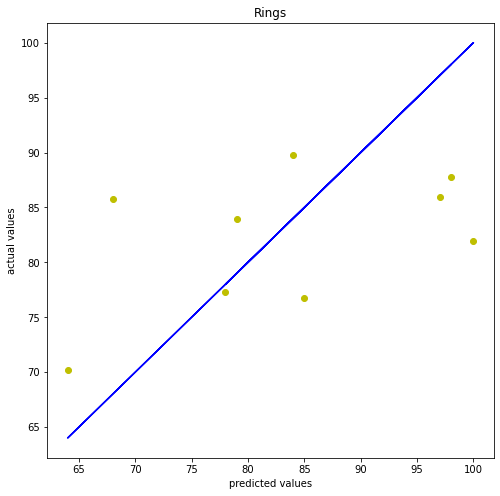

In [792]:
plt.figure(figsize=(8,8))
plt.scatter(x=y_test,y=pred_xgb,color='y')
plt.plot(y_test,y_test,color='b')
plt.xlabel('predicted values')
plt.ylabel('actual values')
plt.title('Rings')
plt.show()

### Hyperparameter Tunning for XGBoost Regressor

In [793]:
modelx =XGBRegressor()
parameters = {'max_depth':[1,4,6,10],'eta':[0.001,0.01,0.3,0.2],'subsample':[0.2,0.5,0.6]}
gridx = GridSearchCV(modelx,parameters,cv=7)
gridx.fit(x_train,y_train)
gridx.best_params_

{'eta': 0.3, 'max_depth': 1, 'subsample': 0.6}

In [794]:
predxg=gridx.predict(x_test)
R2_score=r2_score(y_test,predxg)
print('The R2_score for cv=7 is :',(R2_score*100))

The R2_score for cv=7 is : 62.507887917653605


The R2_score for cv=7 is : 62.507887917653605

The R2_score for cv=5 is : 60.31296938977163

The R2_score for cv=3 is : 60.31296938977163

The R2_score for cv=9 is : 35.92593382826661

We will consider  cv=7 for running the model.

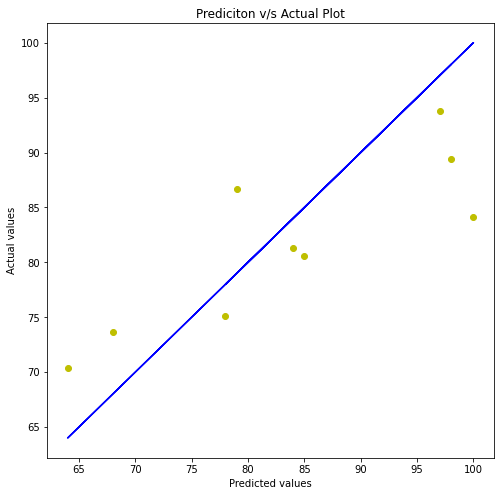

In [795]:
plt.figure(figsize=(8,8))
plt.scatter(x=y_test,y=predxg,color='y')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Prediciton v/s Actual Plot')
plt.show()

## Conclusion:

#### After running all the models we can understand Lasso Regularization is best performing model after hyper tunning ,hence will consider lass as final model at alpha=0.05.

#### For Lasso best R2_score we could achive is 70.84% at alpha = 0.05 and cross folds 2.

Error Mean absolute error 6.1485221301754995

Mean squared error 43.34702487112567

Root mean squared error 6.583845750860637

In [ ]:
Predicted and Actual values

In [801]:
print('the predicted value :',pred_lss[:8])
print('The actual value:',y_test[:8])

the predicted value : [88.47353083 81.65705154 83.01045646 84.32975784 93.23183456 79.26750583
 68.79590919 88.33115675]
The actual value:       W
17   97
12   85
27   79
9    78
15  100
14   68
19   64
26   84


###### Below is the relation plot of predicted and actual values.

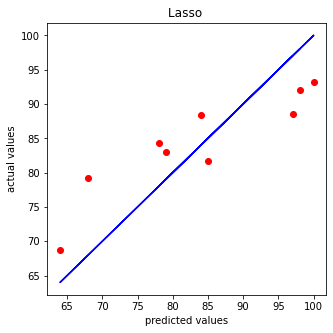

In [802]:
plt.figure(figsize=(5,5))
plt.scatter(x=y_test,y=pred_lss,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('predicted values')
plt.ylabel('actual values')
plt.title('Lasso ')
plt.show()

## JOBLIB

In [799]:
joblib.dump(model_cvls,'BCS.obj')

['BCS.obj']